In [ ]:
Team Id: PNT2022TMID40233

In [ ]:
Global sales data analytics with an Interactive Dashboard

In [ ]:
Dataset used: https://www.kaggle.com/Elumalairjen/global-super-store-dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
#Data Loading

In [ ]:
df = pd.read_excel('/content/Global_Superstore2.xlsx')


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
a = df.groupby(['Order Date', 'Profit'])
a.first()

Row ID         Order ID   Ship Date       Ship Mode  \
Order Date Profit                                                          
2011-01-01 -26.055    11731  IT-2011-3647632  05-01-2011    Second Class   
            15.342    22254    IN-2011-47883  08-01-2011  Standard Class   
            29.640    48883     HU-2011-1220  05-01-2011    Second Class   
            36.036    22253    IN-2011-47883  08-01-2011  Standard Class   
            37.770    22255    IN-2011-47883  08-01-2011  Standard Class   
...                     ...              ...         ...             ...   
2014-12-31  166.440   42474     OD-2014-9490  05-01-2015  Standard Class   
            180.240   15297  ES-2014-5281275  04-01-2015    Second Class   
            216.720   15693  ES-2014-1695428  02-01-2015    Second Class   
            251.400   12929  ES-2014-3458802  05-01-2015  Standard Class   
            301.466    1783   MX-2014-116267  03-01-2015    Second Class   

                    Customer ID     Customer Name      Segment         City  \
Order Date Profit                                                             
2011-01-01 -26.055     EM-14140      Eugene Moren  Home Office    Stockholm   
            15.342     JH-15985       Joseph Holt     Consumer  Wagga Wagga   
            29.640       AT-735     Annie Thurman     Consumer     Budapest   
            36.036     JH-15985       Joseph Holt     Consumer  Wagga Wagga   
            37.770     JH-15985       Joseph Holt     Consumer  Wagga Wagga   
...                         ...               ...          ...          ...   
2014-12-31  166.440     MW-8235  Mitch Willingham    Corporate         Juba   
            180.240    SS-20515   Shirley Schmidt  Home Office       Madrid   
            216.720    RD-19480       Rick Duston     Consumer         Caen   
            251.400    JG-15805        John Grady    Corporate   Maidenhead   
            301.466    EB-13975        Erica Bern    Corporate    São Paulo   

                                 State         Country  ...   Region  \
Order Date Profit                                       ...            
2011-01-01 -26.055           Stockholm          Sweden  ...    North   
            15.342     New South Wales       Australia  ...  Oceania   
            29.640            Budapest         Hungary  ...     EMEA   
            36.036     New South Wales       Australia  ...  Oceania   
            37.770     New South Wales       Australia  ...  Oceania   
...                                ...             ...  ...      ...   
2014-12-31  166.440  Central Equatoria     South Sudan  ...   Africa   
            180.240             Madrid           Spain  ...    South   
            216.720     Lower Normandy          France  ...  Central   
            251.400            England  United Kingdom  ...    North   
            301.466          São Paulo          Brazil  ...    South   

                           Product ID         Category Sub-Category  \
Order Date Profit                                                     
2011-01-01 -26.055    OFF-PA-10001492  Office Supplies        Paper   
            15.342    OFF-PA-10001968  Office Supplies        Paper   
            29.640   OFF-TEN-10001585  Office Supplies      Storage   
            36.036    OFF-SU-10000618  Office Supplies     Supplies   
            37.770    FUR-FU-10003447        Furniture  Furnishings   
...                               ...              ...          ...   
2014-12-31  166.440  TEC-CAN-10004291       Technology      Copiers   
            180.240   TEC-CO-10002284       Technology      Copiers   
            216.720   OFF-ST-10002159  Office Supplies      Storage   
            251.400   TEC-PH-10003683       Technology       Phones   
            301.466   TEC-CO-10000137       Technology      Copiers   

                                                Product Name     Sales  \
Order Date Profit                                                    

In [ ]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [ ]:
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['Market'] = df['Market'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')
df['Order Priority'] = df['Order Priority'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
def remove_leading_spaces(df):
    for cols in df.columns:
        if df[cols].dtypes in ['object','category']:
            df[cols] = df[cols].str.strip()
        return df
df = remove_leading_spaces(df)
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [ ]:
df.groupby(['Country']).count()[['Order ID']]

,Order ID
Country,
Afghanistan,55
Albania,16
Algeria,196
Angola,122
Argentina,390
...,...
Venezuela,194
Vietnam,265
Yemen,30


In [ ]:
df.groupby(['City']).count()[['Order ID']]

,Order ID
City,
Aachen,17
Aalen,1
Aalst,4
Aba,25
Abadan,11
...,...
Zwedru,1
Zwickau,3
Zwolle,2


In [ ]:
df.groupby(['Product ID']).count()[['Order ID']]

,Order ID
Product ID,
FUR-ADV-10000002,2
FUR-ADV-10000108,3
FUR-ADV-10000183,8
FUR-ADV-10000188,5
FUR-ADV-10000190,1
...,...
TEC-STA-10004181,6
TEC-STA-10004536,5
TEC-STA-10004542,5


In [ ]:
top5 = df.groupby(['Country']).sum()[['Quantity']].nlargest(n=5, columns=['Quantity'])
top5

,Quantity
Country,
United States,37873
France,10804
Australia,10673
Mexico,10011
Germany,7745


In [ ]:
df.groupby(['Product ID']).count()[['Order ID']].nlargest(n=5, columns=['Order ID'])

,Order ID
Product ID,
OFF-AR-10003651,35
OFF-AR-10003829,31
OFF-BI-10002799,30
OFF-BI-10003708,30
FUR-CH-10003354,28


In [ ]:
top5 = df.groupby(['Country']).sum()[['Quantity']].nlargest(n=5, columns=['Quantity'])
df2 = df.groupby(['Product Name']).sum()[['Profit']].nlargest(n=5, columns=['Profit'])
df2

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730


In [ ]:
                                                              #Data Exploration

In [ ]:
#TOP 5 PRODUCT BY TOTAL PROFIT


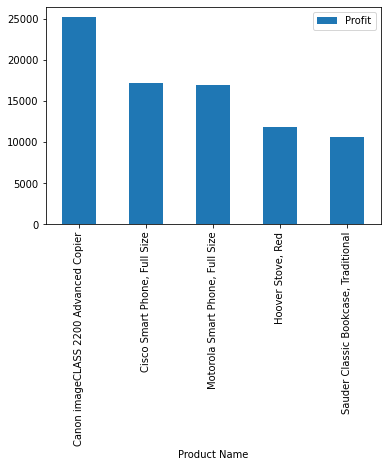

In [ ]:
df.groupby(['Product Name']).sum()[['Profit']].sort_values(by="Profit",ascending=False).nlargest(n=5, columns=['Profit']).plot.bar()

In [ ]:
#TOP 5 COUNTRY BY TOTAL PROFIT

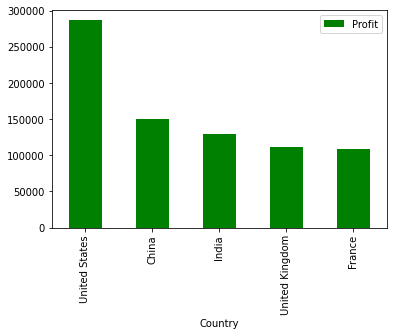

In [ ]:
df.groupby(['Country']).sum()[['Profit']].sort_values(by="Profit",ascending=False).nlargest(n=5, columns=['Profit']).plot.bar(color="green")
plt.show()

In [ ]:
#TOP 5 PRODUCT BY TOTAL ORDER

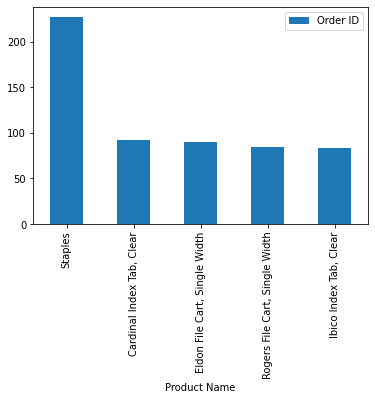

In [ ]:
df.groupby(['Product Name']).count()[['Order ID']].sort_values(by="Order ID",ascending=False).nlargest(n=5, columns=['Order ID']).plot.bar()
plt.show()

In [ ]:
df.groupby(['Product Name']).count()[['Order ID']].nlargest(n=5, columns=['Order ID'])

,Order ID
Product Name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83


In [ ]:
#TOP 10 CITY BY TOTAL ORDER

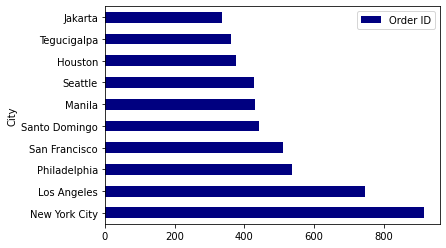

In [ ]:
df.groupby(['City']).count()[['Order ID']].sort_values(by="Order ID",ascending=True).nlargest(n=10, columns=['Order ID']).plot.barh(color='navy')
plt.show()

In [ ]:
#TOTAL ORDER BY CATEGORY

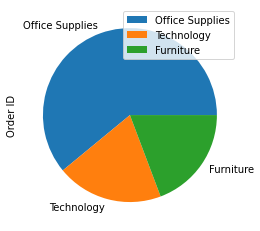

In [ ]:
df.groupby(['Category']).count()[['Order ID']].sort_values(by="Order ID",ascending=False).nlargest(n=5, columns=['Order ID']).plot.pie(subplots=True)
plt.show()

In [ ]:
#TOTAL PROFIT BY CATEGORY

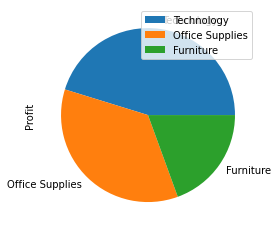

In [ ]:
df.groupby(['Category']).sum()[['Profit']].sort_values(by="Profit",ascending=False).nlargest(n=5, columns=['Profit']).plot.pie(subplots=True)
plt.show()